In [1]:
# get the giant df that was made from pdfs

import pandas as pd

giant_df = pd.read_csv('data/20200502_20200817_pdfs.csv')

# clean the index
giant_df.reset_index(drop=True)
giant_df.drop(giant_df.columns[0], axis=1, inplace=True)


# manual fixing of some rows
giant_df.iloc[1412,:] = 'Akwa Ibom', 48, 3, 17, 3, 2, 0, 29, '2020-06-13'
giant_df.iloc[2957,:] = 'FCT', 3560, 35, 1077, 13, 41, 0, 2442, '2020-07-28'
giant_df.iloc[2984,:] = 'Sokoto', 154, 0, 137, 90, 16, 0, 1, '2020-07-28'

giant_df.iloc[1494,:] = 'Lagos', 7461, 142, 1302, 165, 107, 25, 6052, '2020-06-16'
giant_df.iloc[2436,:] = 'Lagos', 12711, 128, 1935, 19, 175, 2, 10601, '2020-07-14'
giant_df.iloc[3550,:] = 'Lagos', 16369, 113, 14457, 1325, 201, 0, 1711, '2020-08-14'
giant_df.iloc[3587,:] = 'Lagos', 16456, 87, 14467, 10, 201, 0, 1788, '2020-08-15'

In [2]:
# manual tracing & fixing

# giant_df[giant_df['date']=='2020-08-15']['state']
# giant_df.iloc[3587,:] = 'Lagos', 16456, 87, 14467, 10, 201, 0, 1788, '2020-08-15'
# giant_df.iloc[3587,:]

In [3]:
# convert date from string to date format
giant_df['date']= giant_df['date'].astype('datetime64[ns]')

# check information
giant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   state             3735 non-null   object        
 1   total_confirmed   3735 non-null   object        
 2   new_confirmed     3735 non-null   object        
 3   total_discharged  3735 non-null   object        
 4   new_dicharged     3735 non-null   int64         
 5   total_deaths      3735 non-null   object        
 6   new_deaths        3735 non-null   object        
 7   total_active      3735 non-null   object        
 8   date              3735 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 262.7+ KB


In [4]:
# inspect
giant_df.head()

,state,total_confirmed,new_confirmed,total_discharged,new_dicharged,total_deaths,new_deaths,total_active,date
0,Lagos,1068,62,247,22,30,2,791,2020-05-02
1,Kano,313,2,7,7,6,3,300,2020-05-02
2,FCT,266,52,36,0,3,0,227,2020-05-02
3,Gombe,96,4,0,0,0,0,96,2020-05-02
4,Borno,75,6,0,0,11,5,64,2020-05-02


In [5]:
# inspect

display(giant_df.index.nunique())
giant_df.columns

3735

Index(['state', 'total_confirmed', 'new_confirmed', 'total_discharged',
       'new_dicharged', 'total_deaths', 'new_deaths', 'total_active', 'date'],
      dtype='object')

### Leave digits-only in an entry

In [6]:
# most entries are strings => convert into numeric

import numpy as np

for i in [1,2,3,5,6,7]:
    # print(i)
    giant_df.iloc[:,i] = giant_df.iloc[:,i].apply(lambda x: ''.join(ch for ch in str(x) if ch.isdigit()))
    giant_df.iloc[:,i] = pd.to_numeric(giant_df.iloc[:,i])
    # sub_df.iloc[:,i] = sub_df.iloc[:,i].apply(lambda x: int(x) if x else 'missing')
    
giant_df.info()
# why are total confirmed and new_confirmed floats ??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   state             3735 non-null   object        
 1   total_confirmed   3735 non-null   int64         
 2   new_confirmed     3735 non-null   int64         
 3   total_discharged  3735 non-null   int64         
 4   new_dicharged     3735 non-null   int64         
 5   total_deaths      3735 non-null   int64         
 6   new_deaths        3735 non-null   int64         
 7   total_active      3735 non-null   int64         
 8   date              3735 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 262.7+ KB


### Make sub-df's by date

In [7]:
# get a list of dates - useful for iterating through them later

date_list = giant_df['date'].unique().tolist()
display(len(date_list))

# sort the list alphabetically - this just puts 2020-07-07 in its place
date_list = sorted(date_list)
# display(date_list)

# rev_date_list = sorted(date_list, reverse=True)
# print(rev_date_list)

103

In [8]:
# split into separate df's by date
# create a list of df's, ordered by date
# within each df, order rows by state alphabetically

groups = giant_df.groupby('date')

df_list = []
for date in date_list:
    df = groups.get_group(date)
    
    # within each df, order rows alphabetically by state
    df.sort_values(by=['state'], inplace=True)
    
    df_list.append(df)
print(len(df_list))


103


<ipython-input-8-31dcf31b8dd0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['state'], inplace=True)


## Let's get Nigerian data to scroll

In [9]:
# test date conversions
# pd.to_datetime(date_list[curr_pos]).date()

In [39]:
# hacky way to hide toolbars in the interactive matplotlib plots
# https://stackoverflow.com/questions/41928387/jupyter-interactive-matplotlib-hide-the-toolbar-of-the-interactive-view

# this is ridiculous - it worked once, but then keeps throwing "invalid syntax" error....
# tight_layout saved me anyway though, now the toolbars don't overlap with other elements, so all okay

%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

SyntaxError: invalid syntax (<ipython-input-39-23ae8a4e9138>, line 8)

<IPython.core.display.Javascript object>


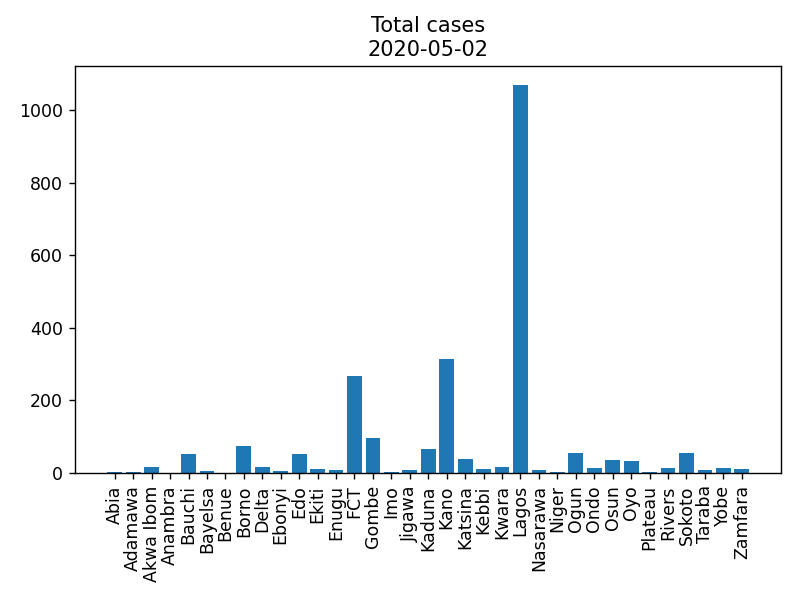

In [15]:
# plot total cases per state, scroll over time

import numpy as np
import matplotlib.pyplot as plt

# enables interactive plot in jupyter
%matplotlib notebook

# define your x and y arrays to be plotted
# add (x,y) tuples to a list
# when you press left / right arrows, you'll move through that list

plots = []
for one_df in df_list:
    x = one_df['state']
    y = one_df['total_confirmed']
    data_tuple = (x,y)
    plots.append(data_tuple)


# now the real code :)
# ie setting up scrolling

curr_pos = 0

def key_event(e):
    global curr_pos

    #if e.key == "right":
    if e.button == 'up':
        curr_pos = curr_pos + 1
        
    #elif e.key == "left":
    elif e.button == 'down':
        curr_pos = curr_pos - 1
    else:
        return
    curr_pos = curr_pos % len(plots)

    # clear the current axes, apparently
    ax.cla()
    
    # your plot
    # using data from the list, choosing positions according to 'curr_pos', which changes as you press left/right arrows
    ax.bar(plots[curr_pos][0], plots[curr_pos][1])
    # make labels vertical
    plt.xticks(rotation=90)
    ax.set_title(f'Total cases\n{pd.to_datetime(date_list[curr_pos]).date()}')
    
    fig.canvas.draw()

    
# need to look into what exactly each one of these does
fig = plt.figure()


# attempt to remove toolbar
#plt.rcParams['toolbar'] = 'toolmanager'
#fig.canvas.manager.toolmanager.add_tool('home')


#fig.canvas.mpl_connect('key_press_event', key_event)
fig.canvas.mpl_connect('scroll_event', key_event)
ax = fig.add_subplot(111)



# I think this is just the starting plot
# if you comment it out, the plot is blank until you press arrow key
ax.bar(plots[curr_pos][0], plots[curr_pos][1])

# make labels vertical
plt.xticks(rotation=90)

# set title to date
ax.set_title(f'Total cases\n{pd.to_datetime(date_list[curr_pos]).date()}')

# fixes space around the plot
plt.tight_layout()

# show plot
plt.show()

<IPython.core.display.Javascript object>


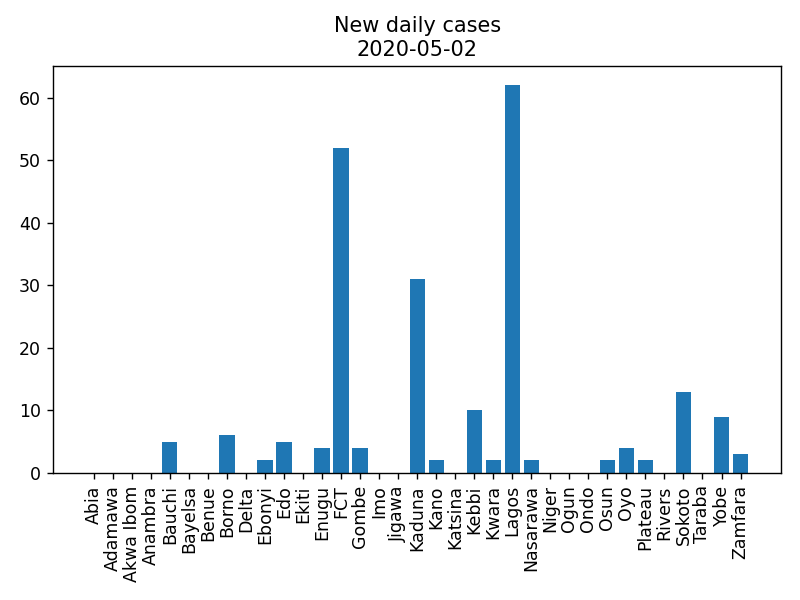

In [18]:
# plot new cases per state, scroll over time

import numpy as np
import matplotlib.pyplot as plt

# enables interactive plot in jupyter
%matplotlib notebook

# define your x and y arrays to be plotted
# add (x,y) tuples to a list
# when you press left / right arrows, you'll move through that list

plots = []
for one_df in df_list:
    x = one_df['state']
    y = one_df['new_confirmed']
    data_tuple = (x,y)
    plots.append(data_tuple)


# now the real code :)
# ie setting up scrolling

curr_pos = 0

def key_event(e):
    global curr_pos

    #if e.key == "right":
    if e.button == 'up':
        curr_pos = curr_pos + 1
        
    #elif e.key == "left":
    elif e.button == 'down':
        curr_pos = curr_pos - 1
    else:
        return
    curr_pos = curr_pos % len(plots)

    # clear the current axes, apparently
    ax.cla()
    
    # your plot
    # using data from the list, choosing positions according to 'curr_pos', which changes as you press left/right arrows
    ax.bar(plots[curr_pos][0], plots[curr_pos][1])
    # make labels vertical
    plt.xticks(rotation=90)
    ax.set_title(f'New daily cases\n{pd.to_datetime(date_list[curr_pos]).date()}')
    
    fig.canvas.draw()

    
# need to look into what exactly each one of these does
fig = plt.figure()


# attempt to remove toolbar
#plt.rcParams['toolbar'] = 'toolmanager'
#fig.canvas.manager.toolmanager.add_tool('home')


#fig.canvas.mpl_connect('key_press_event', key_event)
fig.canvas.mpl_connect('scroll_event', key_event)
ax = fig.add_subplot(111)



# I think this is just the starting plot
# if you comment it out, the plot is blank until you press arrow key
ax.bar(plots[curr_pos][0], plots[curr_pos][1])
# make labels vertical
plt.xticks(rotation=90)
ax.set_title(f'New daily cases\n{pd.to_datetime(date_list[curr_pos]).date()}')

# fixes space around the plot
plt.tight_layout()

# show plot
plt.show()

<IPython.core.display.Javascript object>


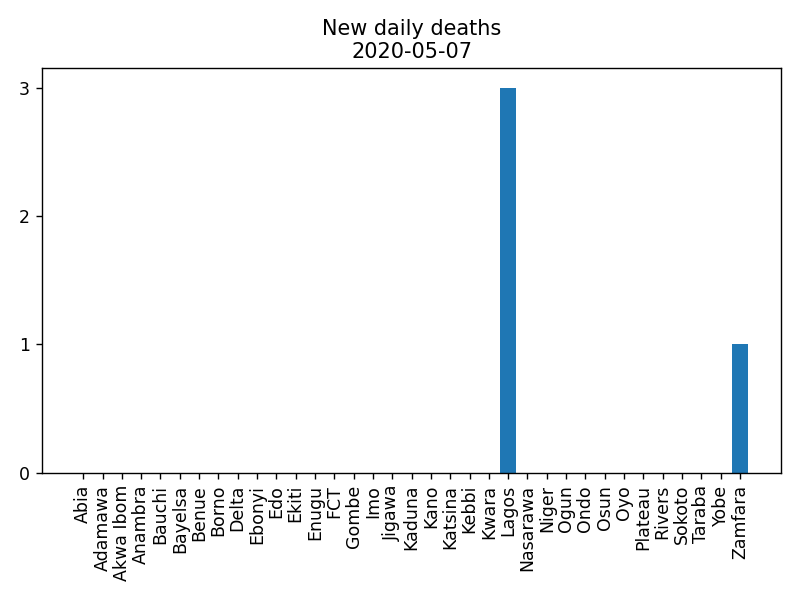

In [41]:
# plot new deaths per state, scroll over time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# enables interactive plot in jupyter
%matplotlib notebook

# define your x and y arrays to be plotted
# add (x,y) tuples to a list
# when you press left / right arrows, you'll move through that list

plots = []
for one_df in df_list:
    x = one_df['state']
    y = one_df['new_deaths']
    data_tuple = (x,y)
    plots.append(data_tuple)


# now the real code :)
# ie setting up scrolling

curr_pos = -1

def key_event(e):
    global curr_pos

    #if e.key == "right":
    if e.button == 'up':
        curr_pos = curr_pos + 1
        
    #elif e.key == "left":
    elif e.button == 'down':
        curr_pos = curr_pos - 1 # set this to zero if you start with plot_0 on show already
    else:
        return
    curr_pos = curr_pos % len(plots)

    # clear the current axes, apparently
    ax.cla()
    
    # your plot
    # using data from the list, choosing positions according to 'curr_pos', which changes as you press left/right arrows
    ax.bar(plots[curr_pos][0], plots[curr_pos][1])
    # make labels vertical
    plt.xticks(rotation=90)
    ax.set_title(f'New daily deaths\n{pd.to_datetime(date_list[curr_pos]).date()}')
    
    # play with y-numbering
#     ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
#     ax.yaxis.set_minor_locator(ticker.MaxNLocator(integer=True))
#     ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))
#     ax.minorticks_off()
    plt.locator_params(axis="y", integer=True, tight=True)
    
    # fixes space around the plot
    plt.tight_layout()
    fig.canvas.draw()

    
# need to look into what exactly each one of these does
fig = plt.figure()


# attempt to remove toolbar
#plt.rcParams['toolbar'] = 'toolmanager'
#fig.canvas.manager.toolmanager.add_tool('home')


#fig.canvas.mpl_connect('key_press_event', key_event)
fig.canvas.mpl_connect('scroll_event', key_event)
ax = fig.add_subplot(111)



# # I think this is just the starting plot
# # if you comment it out, the plot is blank until you press arrow key
# ax.bar(plots[curr_pos][0], plots[curr_pos][1])
# # make labels vertical
# plt.xticks(rotation=90)
# ax.set_title(f'New daily deaths\n{pd.to_datetime(date_list[curr_pos]).date()}')


# fixes space around the plot
plt.tight_layout()

# show plot
plt.show()

## Source: Scrollable matplotlib plots - from stack overflow

https://stackoverflow.com/questions/18390461/scroll-backwards-and-forwards-through-matplotlib-plots/18391039

<IPython.core.display.Javascript object>


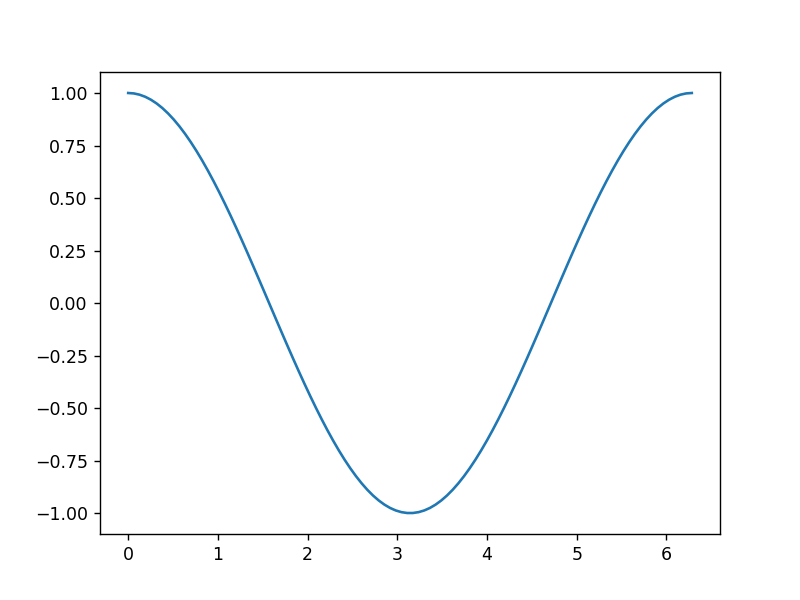

In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook



# define your x and y arrays to be plotted
t = np.linspace(start=0, stop=2*np.pi, num=100)
y1 = np.cos(t)
y2 = np.sin(t)
y3 = np.tan(t)
plots = [(t,y1), (t,y2), (t,y3)]

# now the real code :) 
curr_pos = 0

def key_event(e):
    global curr_pos

    if e.key == "right":
        curr_pos = curr_pos + 1
    elif e.key == "left":
        curr_pos = curr_pos - 1
    else:
        return
    curr_pos = curr_pos % len(plots)

    ax.cla()
    ax.plot(plots[curr_pos][0], plots[curr_pos][1])
    fig.canvas.draw()

fig = plt.figure()
fig.canvas.mpl_connect('key_press_event', key_event)
ax = fig.add_subplot(111)
ax.plot(t,y1)
plt.show()